# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Reading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MLProjectWISE/popular_matches.csv')

In [ ]:

data

,date,place,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict
0,31 August 2019,Unknown,Vasyl Lomachenko,Luke Campbell,72,72,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko won via UD in round 12
1,19 September 2019,Unknown,Orlando Fiordigiglio,Sam Eggington,59,59,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,3.03,6.25,152.50,148.93,Eggington won via KO in round 2
2,5 October 2019,Unknown,Gennady Golovkin,Sergiy Derevyanchenko,82,82,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin won via UD in round 12
3,12 October 2019,Unknown,Chazz Witherspoon,Oleksandr Usyk,69,69,59.6,68.9,79.0,80.0,182,125.0,15.93,9.60,4.76,NaN,292.71,200.10,Usyk won via RTD in round 7
4,27 September 2019,Unknown,Ebenezer Tetteh,Daniel Dubois,46,46,NaN,44.4,50.0,69.0,38,39.0,23.68,30.77,0.00,0.00,178.67,230.38,Dubois won via TKO in round 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,7 March 2020,Unknown,Theophilus Tetteh,Anthony Fowler,56,56,41.7,45.7,67.0,60.0,147,65.0,6.12,13.85,8.00,NaN,154.88,155.90,Fowler won via TKO in round 1
148,22 February 2020,Unknown,Deontay Wilder,Tyson Fury,88,88,63.9,66.9,83.0,86.0,143,186.0,28.67,10.75,0.00,0.00,242.40,247.50,Fury won via TKO in round 7
149,7 March 2020,Unknown,Scott Quigg,Jono Carroll,75,75,63.4,52.2,76.0,63.0,200,122.0,13.00,NaN,0.00,0.00,124.80,133.43,Carroll won via TKO in round 11
150,29 August 2020,Unknown,Joe Hughes,Sam Maxwell,57,57,52.3,NaN,65.0,NaN,182,NaN,3.85,NaN,0.00,0.00,141.86,NaN,Maxwell won via UD in round 10


# **Data Cleaning**

In [ ]:
#converting raw statements to names
data['winner'] = data['verdict'].apply(lambda x: x.split(' ')[0])

In [ ]:
#method of winning
import re
data['reason'] = ' '
for i in range(152):
  if(data['verdict'][i] != "Unknown Result"):
    data['reason'][i] = re.findall(r'\b[A-Z]+\b',data['verdict'][i])[0]

<ipython-input-6-2af93a915be6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reason'][i] = re.findall(r'\b[A-Z]+\b',data['verdict'][i])[0]


In [ ]:
#dropping verdict column
data.drop('verdict', axis=1, inplace=True)

In [ ]:
#drop unnecessary columns
data.drop('date',axis = 1,inplace = True)
data.drop('place',axis = 1,inplace = True)

In [ ]:
#count of null values
data.isnull().sum()

opponent_1                                     0
opponent_2                                     0
opponent_1_estimated_punch_power               0
opponent_2_estimated_punch_power               0
opponent_1_estimated_punch_resistance          2
opponent_2_estimated_punch_resistance          8
opponent_1_estimated_ability_to_take_punch     1
opponent_2_estimated_ability_to_take_punch     7
opponent_1_rounds_boxed                        0
opponent_2_rounds_boxed                       27
opponent_1_round_ko_percentage                24
opponent_2_round_ko_percentage                18
opponent_1_has_been_ko_percentage             17
opponent_2_has_been_ko_percentage             55
opponent_1_avg_weight                          1
opponent_2_avg_weight                         12
winner                                         0
reason                                         0
dtype: int64

In [ ]:
data

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,winner,reason
0,Vasyl Lomachenko,Luke Campbell,72,72,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko,UD
1,Orlando Fiordigiglio,Sam Eggington,59,59,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,3.03,6.25,152.50,148.93,Eggington,KO
2,Gennady Golovkin,Sergiy Derevyanchenko,82,82,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin,UD
3,Chazz Witherspoon,Oleksandr Usyk,69,69,59.6,68.9,79.0,80.0,182,125.0,15.93,9.60,4.76,NaN,292.71,200.10,Usyk,RTD
4,Ebenezer Tetteh,Daniel Dubois,46,46,NaN,44.4,50.0,69.0,38,39.0,23.68,30.77,0.00,0.00,178.67,230.38,Dubois,TKO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Theophilus Tetteh,Anthony Fowler,56,56,41.7,45.7,67.0,60.0,147,65.0,6.12,13.85,8.00,NaN,154.88,155.90,Fowler,TKO
148,Deontay Wilder,Tyson Fury,88,88,63.9,66.9,83.0,86.0,143,186.0,28.67,10.75,0.00,0.00,242.40,247.50,Fury,TKO
149,Scott Quigg,Jono Carroll,75,75,63.4,52.2,76.0,63.0,200,122.0,13.00,NaN,0.00,0.00,124.80,133.43,Carroll,TKO
150,Joe Hughes,Sam Maxwell,57,57,52.3,NaN,65.0,NaN,182,NaN,3.85,NaN,0.00,0.00,141.86,NaN,Maxwell,UD


In [ ]:
#converting winner names to full names (reference from opponents names)
for i in range(152):
  if(data.winner[i] in data.opponent_1[i]):
    data.winner[i]= data.opponent_1[i]
  elif(data.winner[i] in data.opponent_2[i]):
    data.winner[i]= data.opponent_2[i]
  else:
    data.winner[i] = 'draw'

<ipython-input-11-32706725c8be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.winner[i]= data.opponent_1[i]
<ipython-input-11-32706725c8be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.winner[i]= data.opponent_2[i]
<ipython-input-11-32706725c8be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.winner[i] = 'draw'


In [ ]:
#seperate dataframe for opponents
opponents = data.iloc[:,[0,1]]

In [ ]:
#stripping opponents names of any extra whitespaces
for i in range(152):
  opponents.opponent_1[i] = opponents.opponent_1[i].strip()
  opponents.opponent_2[i] = opponents.opponent_2[i].strip()

<ipython-input-13-6f65cf1e7b75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponents.opponent_1[i] = opponents.opponent_1[i].strip()
<ipython-input-13-6f65cf1e7b75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponents.opponent_2[i] = opponents.opponent_2[i].strip()


In [ ]:
#dropping the columns from the original dataframe
data.drop(['opponent_1','opponent_2'],axis = 1,inplace = True)

In [ ]:
data

,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,winner,reason
0,72,72,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,0.00,0.00,127.11,135.24,Vasyl Lomachenko,UD
1,59,59,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,3.03,6.25,152.50,148.93,Sam Eggington,KO
2,82,82,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,0.00,0.00,159.66,164.04,Gennady Golovkin,UD
3,69,69,59.6,68.9,79.0,80.0,182,125.0,15.93,9.60,4.76,NaN,292.71,200.10,Oleksandr Usyk,RTD
4,46,46,NaN,44.4,50.0,69.0,38,39.0,23.68,30.77,0.00,0.00,178.67,230.38,Daniel Dubois,TKO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,56,56,41.7,45.7,67.0,60.0,147,65.0,6.12,13.85,8.00,NaN,154.88,155.90,Anthony Fowler,TKO
148,88,88,63.9,66.9,83.0,86.0,143,186.0,28.67,10.75,0.00,0.00,242.40,247.50,Tyson Fury,TKO
149,75,75,63.4,52.2,76.0,63.0,200,122.0,13.00,NaN,0.00,0.00,124.80,133.43,Jono Carroll,TKO
150,57,57,52.3,NaN,65.0,NaN,182,NaN,3.85,NaN,0.00,0.00,141.86,NaN,Sam Maxwell,UD


In [ ]:
#stripping winner names of whitespaces and comparing with opponents dataframe to figure out winner or draw
for i in range(152):
  if data.winner[i].strip() == opponents.opponent_1[i]:
    data.winner[i] = 0
  elif data.winner[i].strip() == opponents.opponent_2[i]:
    data.winner[i] = 1
  else:
    data.winner[i] = 2


<ipython-input-16-7659b3d4e1d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.winner[i] = 0
<ipython-input-16-7659b3d4e1d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.winner[i] = 1
<ipython-input-16-7659b3d4e1d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.winner[i] = 2


In [ ]:
data.winner.value_counts()

1    96
0    49
2     7
Name: winner, dtype: int64

In [ ]:
#encoding reason
le = LabelEncoder()
data['reason']= le.fit_transform(data['reason'])

In [ ]:
#replacing nulls with 0
for i in data.columns:
  data[i].fillna(data[i].mean() +1.5*data[i].std(),inplace = True)

In [ ]:
data.isnull().sum().sum()

0

#**Correlation**

In [1]:
# # compute correlation matrix
# corr_matrix = data.corr()

# # select columns with correlation less than 0.1
# low_corr_cols = corr_matrix.columns[abs(corr_matrix['winner']) < 0.1].tolist()

In [ ]:
#data.drop(low_corr_cols,axis = 1,inplace = True)

# **Visualization**

<ipython-input-23-ff48c26d8822>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='vlag', annot=False)


<Axes: >

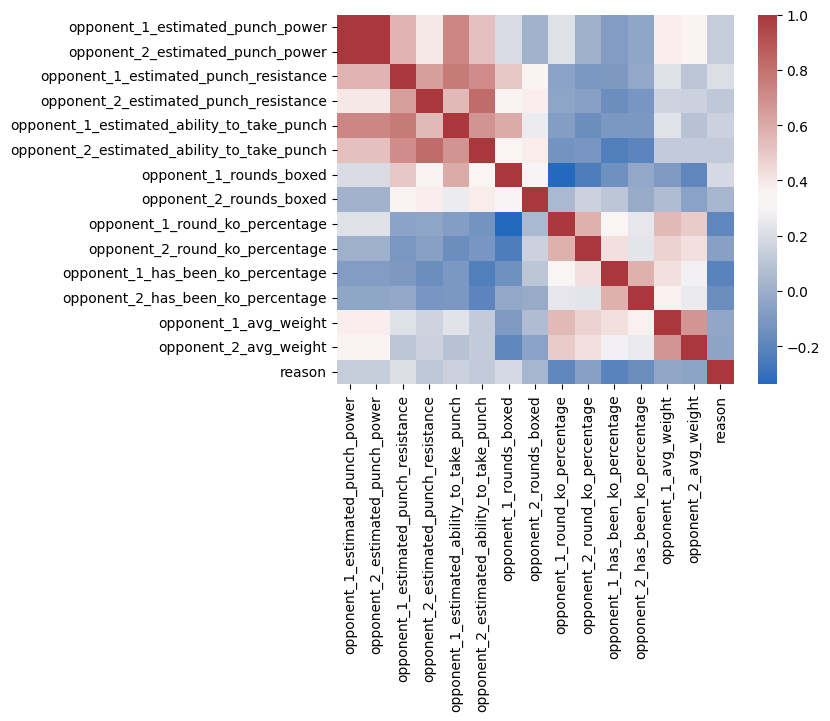

In [ ]:
sns.heatmap(data.corr(), cmap='vlag', annot=False)

# **Dataset Splitting**

In [ ]:
#standardisation
targetop = data.winner
parameters = data.drop('winner',axis = 1)
Standardisation = StandardScaler()
standard_parameters = Standardisation.fit_transform(parameters)

In [ ]:
data.winner.value_counts()

1    96
0    49
2     7
Name: winner, dtype: int64

In [ ]:
#splitting of dataset
x_train, x_test, y_train, y_test = train_test_split(standard_parameters,targetop,test_size=0.28,random_state = 0)
x_train=x_train.astype('int')
y_train=y_train.astype('int')
x_test=x_test.astype('int')
y_test=y_test.astype('int')

In [ ]:
y_train.value_counts()+y_test.value_counts()

1    96
0    49
2     7
Name: winner, dtype: int64

# **K Neighbor Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
prediction1 = knn.predict(x_test)
accuracy1 = knn.score(x_test, y_test)
print('Accuracy:', accuracy1)

Accuracy: 0.6976744186046512


# **Support Vector Classifier**

In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
prediction2 = svc_model .predict(x_test)
accuracy2 = accuracy_score(y_test,prediction2)
print(accuracy2)

0.7209302325581395


# **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

# train the Naive Bayes classifier on the training data
nbc.fit(x_train, y_train)

# make predictions on the testing data
prediction3 = nbc.predict(x_test)

# calculate the accuracy of the classifier
accuracy3 = nbc.score(x_test, y_test)
print('Accuracy:', accuracy3)

Accuracy: 0.11627906976744186


# **Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# evaluate the classifier on the testing data
accuracy4 = lr.score(x_test, y_test)
print('Accuracy:', accuracy4)


Accuracy: 0.7674418604651163


# **Random Forest Classifier**



In [ ]:
#randoom forest classifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
prediction4 = rfc.predict(x_test)

In [ ]:
accuracy5 = rfc.score(x_test, y_test)
print('Accuracy:', accuracy5)

Accuracy: 0.7674418604651163


# **Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train, y_train)
prediction5 = dtc.predict(x_test)
accuracy6 = dtc.score(x_test, y_test)
print('Accuracy:', accuracy6)

Accuracy: 0.6976744186046512


# **XGBoost**

In [ ]:
clf = xgb.XGBClassifier()
# train the classifier on the training data
clf.fit(x_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(x_test)

# evaluate the accuracy of the classifier
accuracy7 = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy7*100))

Accuracy: 67.44%


# **Comparision**

<Axes: title={'center': 'Comparision of Models'}, xlabel='Model'>

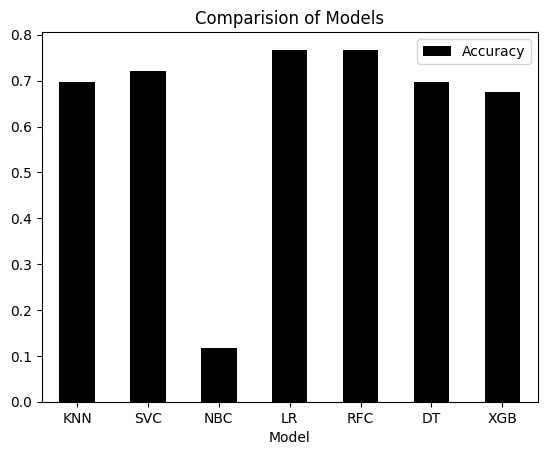

In [ ]:
info = [['KNN', 'SVC', 'NBC', 'LR', 'RFC', 'DT','XGB'],[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7]]
df = pd.DataFrame(columns=['Model', 'Accuracy'])
for i in range(7):
  df.loc[i] = [info[0][i],info[1][i]]
df.plot.bar(x="Model", y="Accuracy",title="Comparision of Models", color = 'black', rot = 0)

In [ ]:
import pickle
pickle.dump(rfc,open('csv.pkl','wb'))

In [ ]:
model = pickle.load(open('csv.pkl','rb'))

# **Deployment**

In [ ]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.8 MB/

In [ ]:
temp = opponents.index[(opponents['opponent_1'] == 'Sugar Ray Leonard') & (opponents['opponent_2'] == 'Marvin Hagler')].tolist()
print(temp)
if temp == []:
    temp = opponents.index[(opponents['opponent_1'] == 'Marvin Hagler') & (opponents['opponent_2'] == 'Sugar Ray Leonard')].tolist()
    if temp == []:
      print('No Sufficient Information about Players')
z = parameters.loc[temp[0]]
lst = z.to_numpy()
ip = (lst - parameters.mean())/parameters.std()
output = rfc.predict([ip])
lst1 = opponents.loc[temp[0]]
if output[0] == 0 or output[0] == 1:
      print(lst1[output[0]])
if output[0] == 2:
       print('Draw')

[19]
Sugar Ray Leonard


In [ ]:
import gradio as gr
title = "Prediction of Boxing matches"
css_code = ".gradio-container{img src ='https://www.shutterstock.com/image-vector/sketch-athlete-boxer-fighter-vector-260nw-1616421661.jpg'} "
description = """
<center>
The bot was trained to predict the winner of your favourite boxing matches. Input the names of the fighters
<img src="https://www.shutterstock.com/image-vector/sketch-athlete-boxer-fighter-vector-260nw-1616421661.jpg" width="600" height="600">
</center>
"""
# Define your function
def my_function(input1, input2):
    # Process the inputs
    temp = opponents.index[(opponents['opponent_1'] == input1) & (opponents['opponent_2'] == input2)].tolist()
    if temp == []:
          temp = opponents.index[(opponents['opponent_1'] == input2) & (opponents['opponent_2'] == input1)].tolist()
          if temp == []:
            return 'No Sufficient Information about Players'
    z = parameters.loc[temp[0]]
    lst = z.to_numpy()
    ip = (lst - parameters.mean())/parameters.std()
    output = rfc.predict([ip])
    lst1 = opponents.loc[temp[0]]
    if output[0] == 0 or output[0] == 1:
      return lst1[output[0]]
    if output[0] == 2:
       return 'Draw'

    # output = f"Input 1: {input1}\nInput 2: {input2}"

# Define the input components
input1 = gr.inputs.Textbox(label="Fighter 1")
input2 = gr.inputs.Textbox(label="Fighter 2")

# Define the output component
output = gr.outputs.Textbox(label="Verdict")

# Create the interface
interface = gr.Interface(fn=my_function, inputs=[input1, input2], outputs=output,description = description,title=title,css = css_code)

# Launch the interface
interface.launch()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


ImportError: ignored